# Content

    1. Problem Definition
    
    2. Getting Started - Load Libraries and Dataset
        2.1. Load Libraries
        2.2. Load Dataset
        
    3. Exploratory Data Analysis
        3.1. Descriptive Statistics
        3.2. Data Cleaning
        
    4. Data Visualization
        4.1. Distribution Analysis 
      
    5. Model Development and Evaluation
        5.1. Model Implementation
        5.2. Train and Evaluate Models
        5.3. Success Criteria and Model Evaluation
        5.4. Cross-validation
        5.5. Hyperparameter Tuning
        
    6. Results Analysis
        6.1. Model Comparison
        6.2. Visual Analysis
        6.3. Detailed Metrics
        6.4. Final Performance Visualization
       
    7. Conclusions
        
    9. References
   
        
# 1. Problem Definition

The primary goal of this study is to develop a highly accurate prediction model for housing prices in Beijing, taking into account critical factors such as property structure, location, and market circumstances. The emphasis is on identifying patterns and variables that have a significant impact on property appraisals, which will allow for a better knowledge and forecast of future housing price trends in the city.

The project's goal is to create a comprehensive forecast model for Beijing home prices that takes into account particular factors such as owner occupancy time, renovation patterns, and building density. It tries to accurately anticipate values as well as identify potentially abandoned or deteriorating regions by analysing historical data from the real estate market (2011-2017) and applying three machine learning algorithms (Linear Regression, Random Forest, and SVR).




# 2. Getting Started - Load Libraries and Dataset

## 2.1.Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

## 2.2. Load Dataset

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type.

In [2]:
data = pd.read_csv('housing.csv', encoding="latin1")
data = data.sample(frac=0.2)

C:\Users\monte\AppData\Local\Temp\ipykernel_14576\1655641777.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('housing.csv', encoding="latin1")


In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
247945,https://bj.lianjia.com/chengjiao/BJHD85639298....,BJHD85639298,116.308980,39.979969,1111027378671,2013-03-24,NaN,0,265.0,46224,...,1.0,Î´Öª,1,6,0.138,1.0,0.0,1.0,8,79959.0
54442,https://bj.lianjia.com/chengjiao/101100974786....,101100974786,116.439420,40.072066,1111027380051,2017-02-20,65.0,64,325.0,43386,...,1.0,2001,4,2,0.250,1.0,1.0,0.0,6,40934.0
50324,https://bj.lianjia.com/chengjiao/101100878768....,101100878768,116.352899,39.889225,1111027374483,2016-12-19,25.0,98,165.0,44047,...,1.0,2007,3,6,0.083,0.0,0.0,0.0,10,79570.0
151380,https://bj.lianjia.com/chengjiao/BJCY87582614....,BJCY87582614,116.504397,39.929410,1111027376016,2015-03-09,NaN,36,199.0,32316,...,4.0,1992,4,2,0.333,0.0,1.0,1.0,7,56893.0
253058,https://bj.lianjia.com/chengjiao/BJHD87775038....,BJHD87775038,116.352882,40.050230,1111027378224,2014-07-03,NaN,1,225.0,32747,...,4.0,2006,4,6,0.333,1.0,0.0,1.0,8,71309.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 247945 to 215020
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  object 
 6   DOM                  32161 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null

In [5]:
data.shape

(63770, 26)

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,63770.000000,63770.000000,6.377000e+04,32161.000000,63770.000000,63770.000000,63770.000000,63770.000000,63770.00000,63348.000000,63770.000000,63770.000000,63770.000000,63762.000000,63762.000000,63762.000000,63770.000000,63685.000000
mean,116.418410,39.949823,1.125620e+12,28.877554,16.754461,349.298724,43605.053034,83.150604,0.99437,2.998522,2.606178,4.460812,0.379134,0.581930,0.645933,0.603479,6.776635,63839.138384
std,0.112196,0.091683,1.302692e+12,50.745419,34.366795,225.588954,21655.557805,36.868597,0.10924,1.275224,1.310787,1.901495,0.175183,0.493246,0.478233,0.489179,2.810630,22432.582444
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,2.000000,6.900000,0.00000,0.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20483.000000
25%,116.344985,39.892777,1.111027e+12,1.000000,0.000000,205.000000,28080.250000,57.900000,1.00000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46410.000000
50%,116.416780,39.934558,1.111027e+12,6.000000,5.000000,295.000000,38828.000000,74.230000,1.00000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59179.000000
75%,116.477581,40.002381,1.111027e+12,37.000000,18.000000,426.000000,54050.500000,98.757500,1.00000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,76223.000000
max,116.732378,40.252758,1.184867e+14,1401.000000,1085.000000,4304.000000,150000.000000,510.000000,4.00000,4.000000,4.000000,6.000000,3.000000,1.000000,1.000000,1.000000,13.000000,183109.000000


# 3. Exploratory Data Analysis
## 3.1 Descriptive Statistics

Convert object columns to numeric:

In [7]:
data['tradeTime'] = data['tradeTime'].str.extract(r'(\d{4})', expand=False)
data['tradeTime'] = pd.to_numeric(data['tradeTime'], errors='coerce')

In [8]:
data['constructionTime'] = data['constructionTime'].str.extract(r'(\d{4})', expand=False)
data['constructionTime'] = pd.to_numeric(data['constructionTime'], errors='coerce')

In [9]:
data.head(10)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
247945,https://bj.lianjia.com/chengjiao/BJHD85639298....,BJHD85639298,116.308980,39.979969,1111027378671,2013,NaN,0,265.0,46224,...,1.0,NaN,1,6,0.138,1.0,0.0,1.0,8,79959.0
54442,https://bj.lianjia.com/chengjiao/101100974786....,101100974786,116.439420,40.072066,1111027380051,2017,65.0,64,325.0,43386,...,1.0,2001.0,4,2,0.250,1.0,1.0,0.0,6,40934.0
50324,https://bj.lianjia.com/chengjiao/101100878768....,101100878768,116.352899,39.889225,1111027374483,2016,25.0,98,165.0,44047,...,1.0,2007.0,3,6,0.083,0.0,0.0,0.0,10,79570.0
151380,https://bj.lianjia.com/chengjiao/BJCY87582614....,BJCY87582614,116.504397,39.929410,1111027376016,2015,NaN,36,199.0,32316,...,4.0,1992.0,4,2,0.333,0.0,1.0,1.0,7,56893.0
253058,https://bj.lianjia.com/chengjiao/BJHD87775038....,BJHD87775038,116.352882,40.050230,1111027378224,2014,NaN,1,225.0,32747,...,4.0,2006.0,4,6,0.333,1.0,0.0,1.0,8,71309.0
69656,https://bj.lianjia.com/chengjiao/101101309595....,101101309595,116.429292,40.111125,1111027378308,2017,19.0,29,460.0,46796,...,4.0,2002.0,3,2,0.500,0.0,0.0,0.0,6,42786.0
253807,https://bj.lianjia.com/chengjiao/BJHD88000154....,BJHD88000154,116.351540,39.954963,1111027377070,2015,1.0,11,715.0,52378,...,1.0,2003.0,2,6,0.250,1.0,1.0,0.0,8,97294.0
292256,https://bj.lianjia.com/chengjiao/BJTJ89826113....,BJTJ89826113,116.690070,39.870642,1111027376744,2015,NaN,2,215.0,23850,...,4.0,2010.0,3,6,0.500,1.0,0.0,0.0,11,49897.0
136893,https://bj.lianjia.com/chengjiao/BJCY85491080....,BJCY85491080,116.418802,40.010659,1111027375984,2013,NaN,0,400.0,40684,...,1.0,2008.0,1,6,0.400,1.0,0.0,1.0,7,79346.0
308233,https://bj.lianjia.com/chengjiao/BJXC88996518....,BJXC88996518,116.346469,39.882483,1111027377722,2015,1.0,7,162.0,39055,...,1.0,2004.0,3,6,0.231,1.0,1.0,0.0,10,81221.0


In [10]:
columns_to_convert = ['livingRoom', 'drawingRoom', 'bathRoom']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [11]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
247945,https://bj.lianjia.com/chengjiao/BJHD85639298....,BJHD85639298,116.308980,39.979969,1111027378671,2013,NaN,0,265.0,46224,...,1.0,NaN,1,6,0.138,1.0,0.0,1.0,8,79959.0
54442,https://bj.lianjia.com/chengjiao/101100974786....,101100974786,116.439420,40.072066,1111027380051,2017,65.0,64,325.0,43386,...,1.0,2001.0,4,2,0.250,1.0,1.0,0.0,6,40934.0
50324,https://bj.lianjia.com/chengjiao/101100878768....,101100878768,116.352899,39.889225,1111027374483,2016,25.0,98,165.0,44047,...,1.0,2007.0,3,6,0.083,0.0,0.0,0.0,10,79570.0
151380,https://bj.lianjia.com/chengjiao/BJCY87582614....,BJCY87582614,116.504397,39.929410,1111027376016,2015,NaN,36,199.0,32316,...,4.0,1992.0,4,2,0.333,0.0,1.0,1.0,7,56893.0
253058,https://bj.lianjia.com/chengjiao/BJHD87775038....,BJHD87775038,116.352882,40.050230,1111027378224,2014,NaN,1,225.0,32747,...,4.0,2006.0,4,6,0.333,1.0,0.0,1.0,8,71309.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 247945 to 215020
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  int64  
 6   DOM                  32161 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63762 non-null  float64
 12  drawingRoom          63762 non-null  float64
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63769 non-null  float64
 15  floor                63770 non-null

## 3.2 Data Cleaning

Since these variables do not seem to influence my target variable, they are removed to simplify the analysis, since I consider that it does not contain relevant information.

In [13]:
data.drop(['url', 'id', 'Cid', 'floor'], axis=1, inplace=True, errors='ignore')

Dropping rows with missed prices (target variable)

In [14]:
data.dropna(subset=['price'], inplace=True)

These missing values are placed so that they can later be recognized as missing values and treated appropriately in the resulting DataFrame.

In [15]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

  # Plot missing values

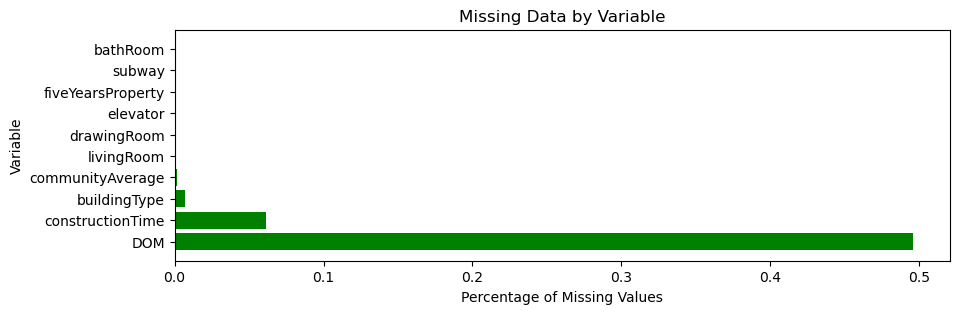

In [16]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the DOM,buildingType,communityAverage and constructionTime columns,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [17]:
data[['DOM','constructionTime','buildingType', 'communityAverage']].describe() 

,DOM,constructionTime,buildingType,communityAverage
count,32161.000000,59862.000000,63348.000000,63685.000000
mean,28.877554,1999.232585,2.998522,63839.138384
std,50.745419,8.768925,1.275224,22432.582444
min,1.000000,1950.000000,0.048000,20483.000000
25%,1.000000,1994.000000,1.000000,46410.000000
50%,6.000000,2001.000000,4.000000,59179.000000
75%,37.000000,2006.000000,4.000000,76223.000000
max,1401.000000,2016.000000,4.000000,183109.000000


Analysis of the real estate market shows surprising facts, prices range from 14,773 to 183,109, with an average of 63,729, demonstrating how location effects value. The majority of the properties are very recent, built around 1994, with a concentration around 2001. Although the average rental time is 29 days, the reality varies: some houses rent in one day, while others might take up to 1,352 days, with the majority finding a tenant within a week.

# 4. Data Visualization
## 4.1. Distribution Analysis

Depending on the nature of the data and the context of the problem, an imputation method is chosen for each column

In [18]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)
data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)
data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

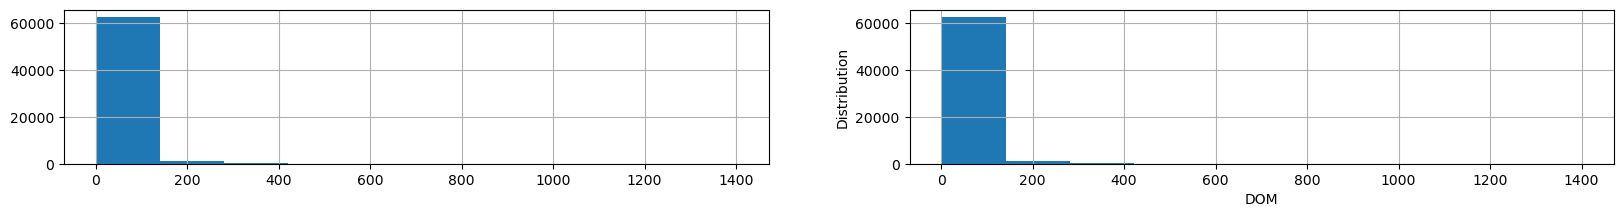

In [19]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['DOM'].hist(ax=ax1)
plt.xlabel('DOM')
plt.ylabel('Distribution')

data['DOM'].fillna(data['DOM'].mean(), inplace=True)

data['DOM'].hist(ax=ax2)

plt.show()

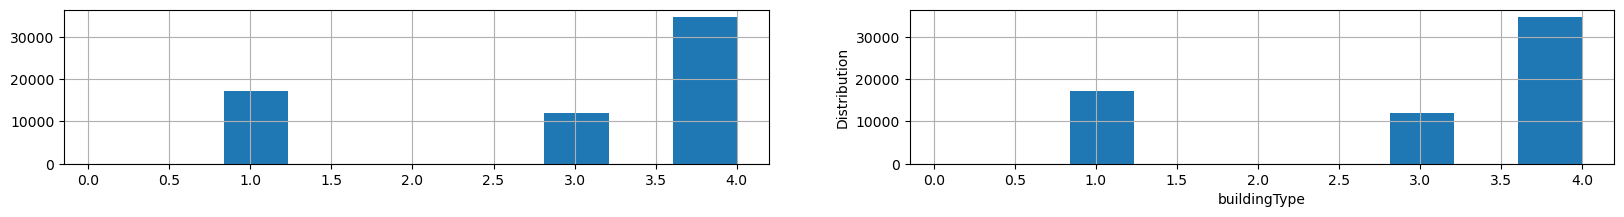

In [20]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['buildingType'].hist(ax=ax1)
plt.xlabel('buildingType')
plt.ylabel('Distribution')

data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)

data['buildingType'].hist(ax=ax2)

plt.show()

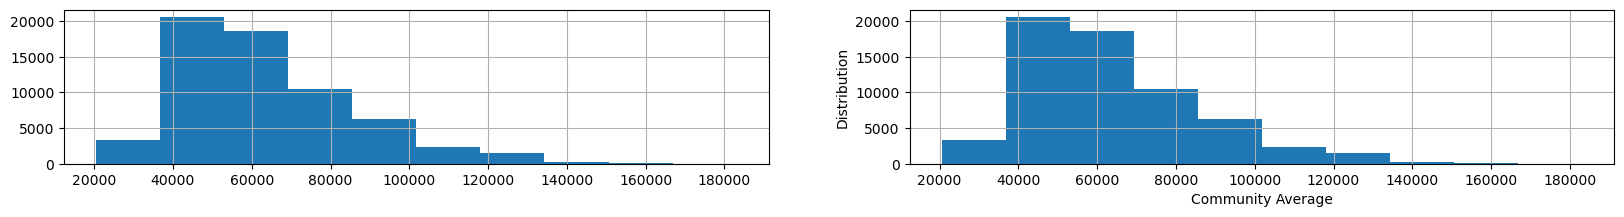

In [21]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()

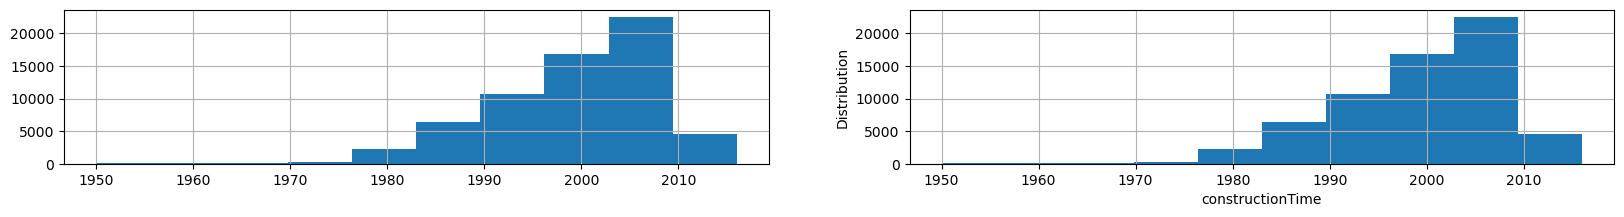

In [22]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['constructionTime'].hist(ax=ax1)
plt.xlabel('constructionTime')
plt.ylabel('Distribution')

data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

data['constructionTime'].hist(ax=ax2)

plt.show()

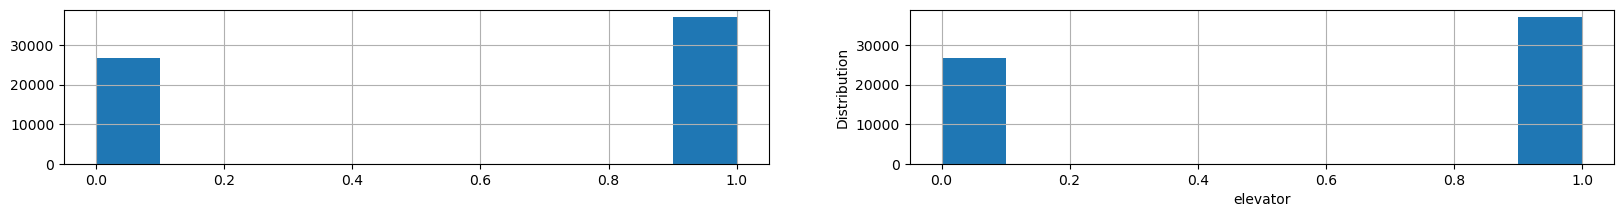

In [23]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['elevator'].hist(ax=ax1)
plt.xlabel('elevator')
plt.ylabel('Distribution')

data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)

data['elevator'].hist(ax=ax2)

plt.show()

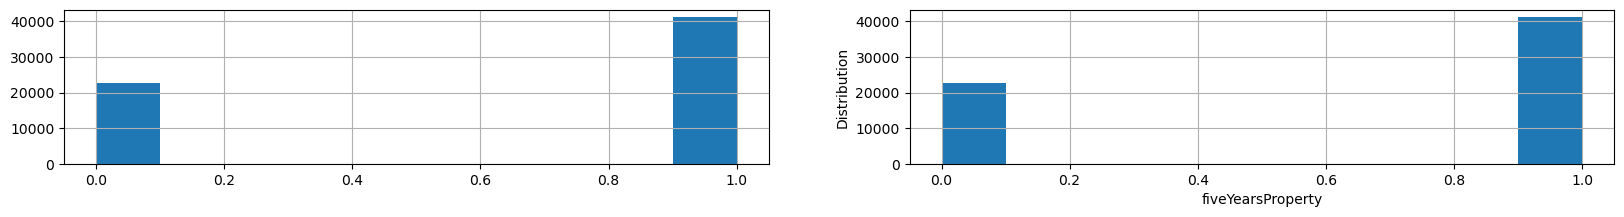

In [24]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['fiveYearsProperty'].hist(ax=ax1)
plt.xlabel('fiveYearsProperty')
plt.ylabel('Distribution')

data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)

data['fiveYearsProperty'].hist(ax=ax2)

plt.show()

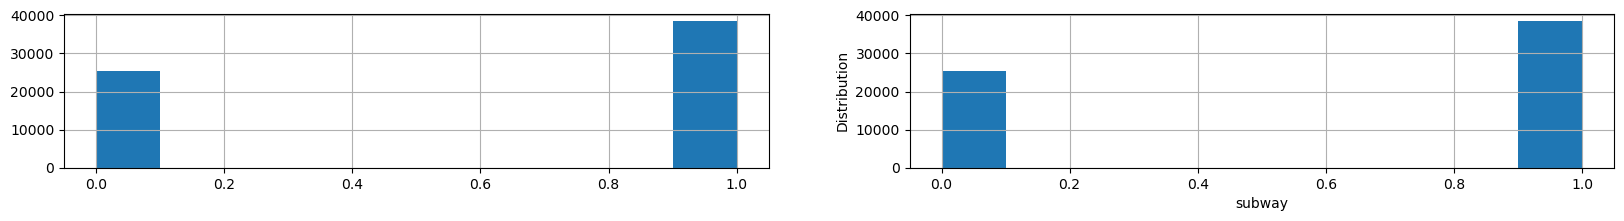

In [25]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['subway'].hist(ax=ax1)
plt.xlabel('subway')
plt.ylabel('Distribution')

data['subway'].fillna(data['subway'].mode()[0], inplace=True)

data['subway'].hist(ax=ax2)

plt.show()

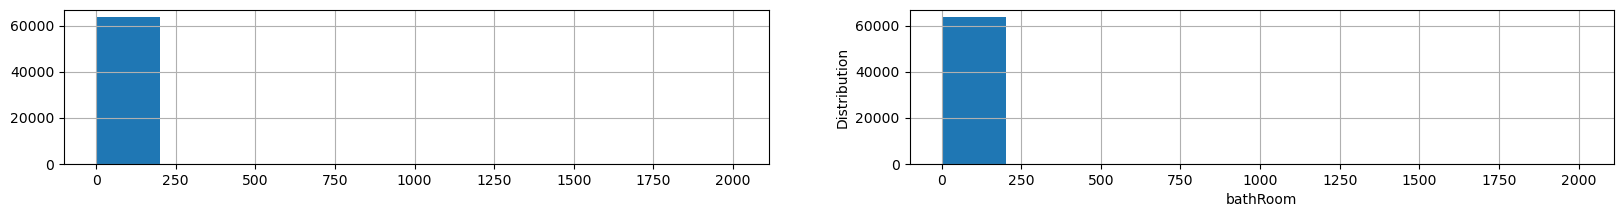

In [26]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['bathRoom'].hist(ax=ax1)
plt.xlabel('bathRoom')
plt.ylabel('Distribution')

data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

data['bathRoom'].hist(ax=ax2)

plt.show()

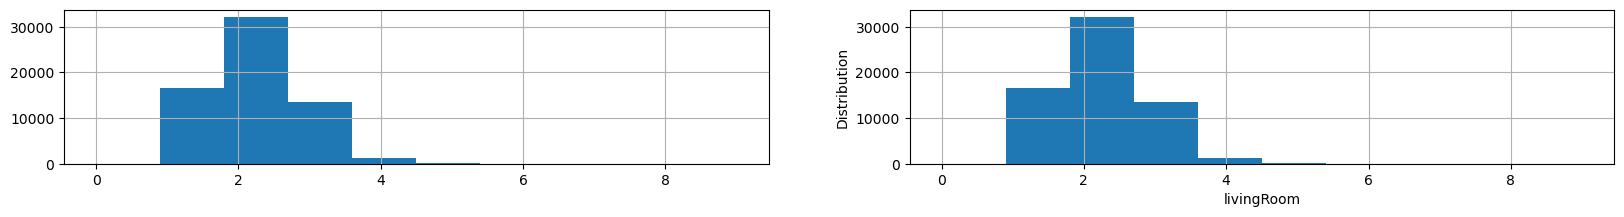

In [27]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['livingRoom'].hist(ax=ax1)
plt.xlabel('livingRoom')
plt.ylabel('Distribution')

data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)

data['livingRoom'].hist(ax=ax2)

plt.show()

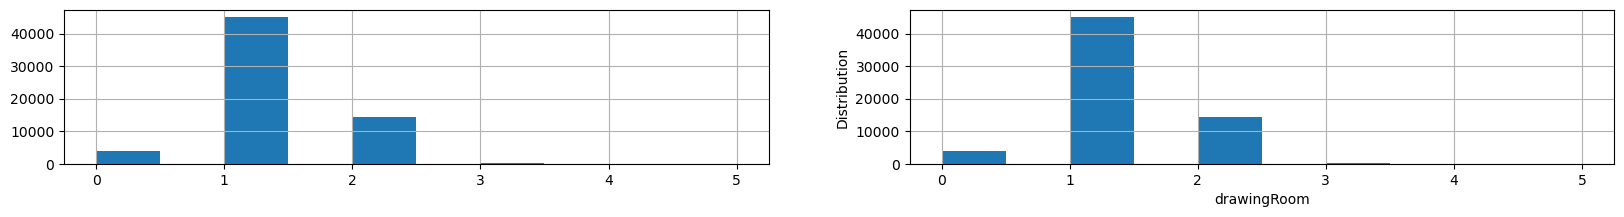

In [28]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['drawingRoom'].hist(ax=ax1)
plt.xlabel('drawingRoom')
plt.ylabel('Distribution')

data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

data['drawingRoom'].hist(ax=ax2)

plt.show()

It can be observed that the graphs do not show significant changes from one to the other, so we can conclude that the imputation of missing values does not alter the distributions of the variables.

Identifying which columns have missing values:

In [29]:
data.isnull().sum()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 247945 to 215020
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  63770 non-null  float64
 1   Lat                  63770 non-null  float64
 2   tradeTime            63770 non-null  int64  
 3   DOM                  63770 non-null  float64
 4   followers            63770 non-null  int64  
 5   totalPrice           63770 non-null  float64
 6   price                63770 non-null  int64  
 7   square               63770 non-null  float64
 8   livingRoom           63770 non-null  float64
 9   drawingRoom          63770 non-null  float64
 10  kitchen              63770 non-null  int64  
 11  bathRoom             63770 non-null  float64
 12  buildingType         63770 non-null  float64
 13  constructionTime     63770 non-null  float64
 14  renovationCondition  63770 non-null  int64  
 15  buildingStructure    63770 non-null

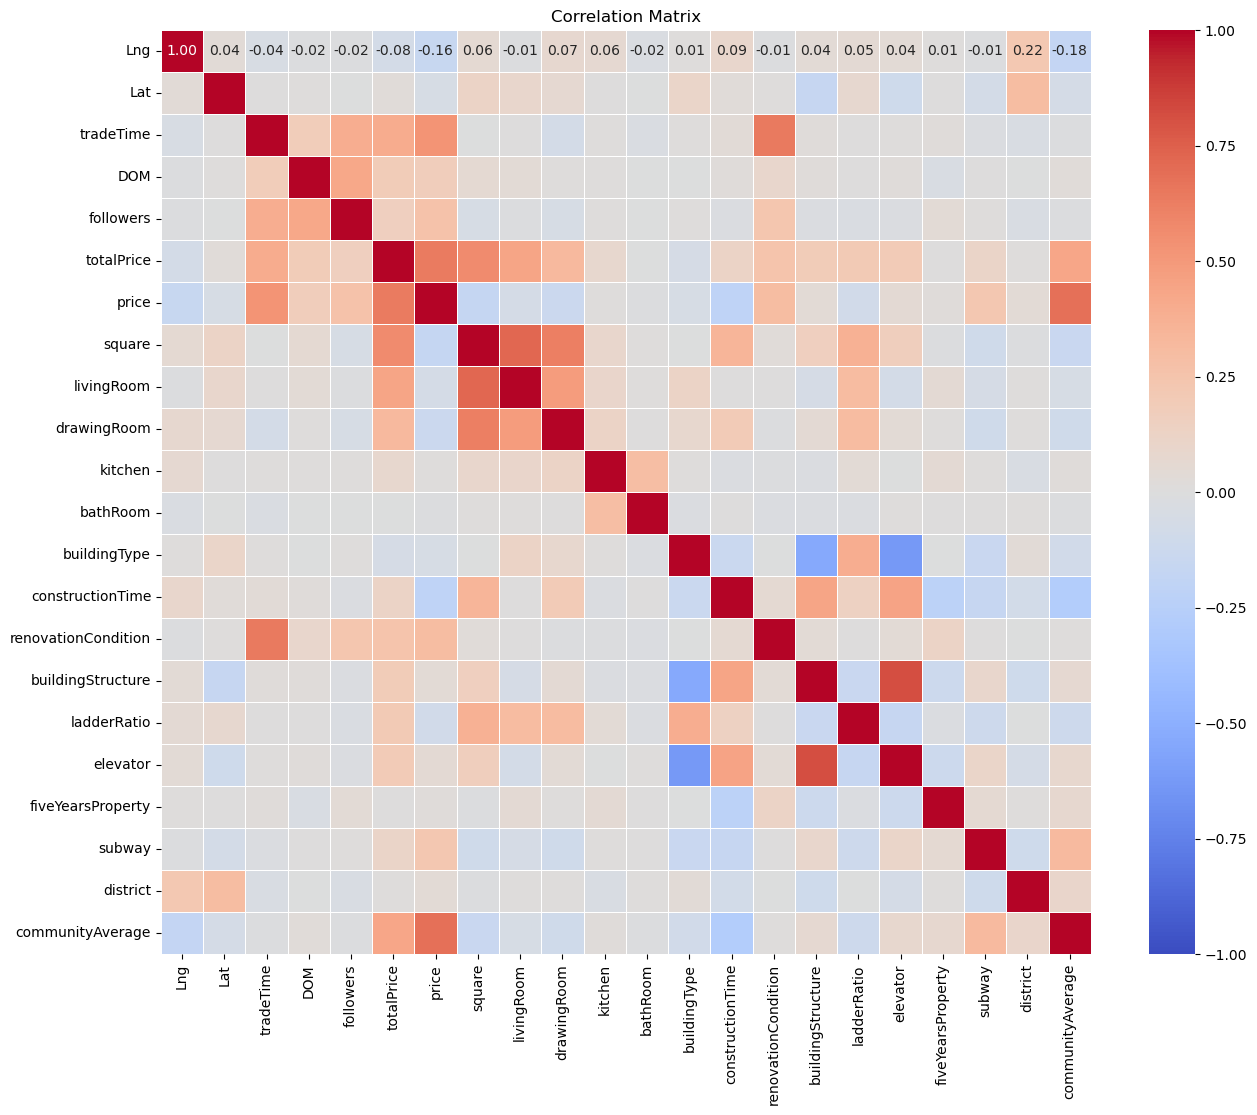

In [31]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation graph between numerical variables shows that the variables “living room”, “lounge”, “elevator” and “building structure”, among others, are represented by red dots and red derivatives that are close to the central red line. This suggests that these variables have a moderate correlation with each other and with the central tendency line, indicating a consistent and significant relationship between them.

## Categorical Variables

In [32]:
data_copy = data.copy()
building_type_mapping = {1: 'Tower', 2: 'Bungalow', 3: 'Plate/Tower', 4: 'Plate'}
data_copy['buildingType'] = data_copy['buildingType'].replace(building_type_mapping)

In [33]:
data_copy = data_copy[data_copy['buildingType'].isin(building_type_mapping.values())]
data_copy['buildingType'] = data_copy['buildingType'].astype('category')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


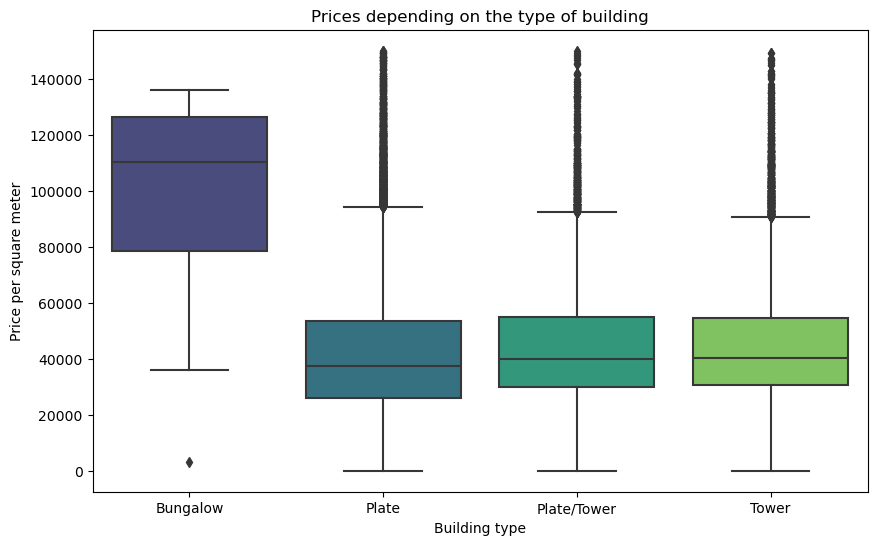

In [34]:
data_copy['buildingType'] = data_copy['buildingType'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='buildingType', y='price', palette='viridis')
plt.title('Prices depending on the type of building')
plt.ylabel('Price per square meter')
plt.xlabel('Building type')
plt.show()

In this graph, I can see that the box plot for 'Bungalow' (single-family houses) has a far larger price range than the other building kinds. Its highest point is substantially higher than the others, demonstrating that some bungalow-style residences can command extremely high prices. On the other side, its minimum point is higher, indicating that this form of construction has a larger base price level than others. 

In contrast, "Tower" type structures have a smaller price range but a greater median value (the line inside the box) than the other types. This suggests that towers are priced more consistently and higher in the market. "Plate" and "Plate/Tower" type buildings have intermediate ranges, with median costs falling somewhere between bungalows and skyscrapers. This data shows that building type has a significant impact on property values in Beijing, most likely due to differences in size, location, facilities, and other perceived value factors by purchasers.

In [35]:
building_type_mapping = {1: 'Other', 2: 'Rough', 3: 'Simplicity', 4: 'Hardcover'}
data_copy['renovationCondition'] = data_copy['renovationCondition'].replace(building_type_mapping)

In [36]:
data_copy = data_copy[data_copy['renovationCondition'].isin(building_type_mapping.values())]
data_copy['renovationCondition'] = data_copy['renovationCondition'].astype('category')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


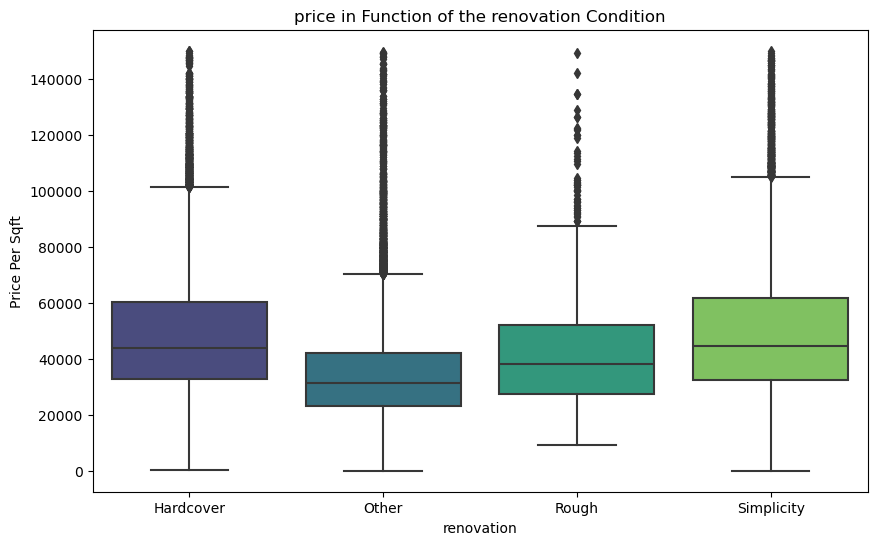

In [37]:
data_copy['renovationCondition'] = data_copy['renovationCondition'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='renovationCondition', y='price', palette='viridis')
plt.title('price in Function of the renovation Condition')
plt.ylabel('Price Per Sqft')
plt.xlabel('renovation')
plt.show()

In terms of renovation conditions, I can see from this chart that the "Simplicity" category has the largest price range, with a maximum value that is noticeably greater than the other categories. Although it should be emphasized that this could also be attributable to the year of construction—possibly the Simplicity buildings are the ones that have been built the longest—it could imply that residences with more elegant and straightforward renovations can get the highest values on the market. 

The "Hardcover" category, on the other hand, has the most limited price range and often lower values; however, this might be because these structures are newer. Although they are not as appealing as the "Simplicity" remodeling homes, the "Other" and "Rough" categories fall in the center of the pricing range, suggesting that they are still suitable choices.

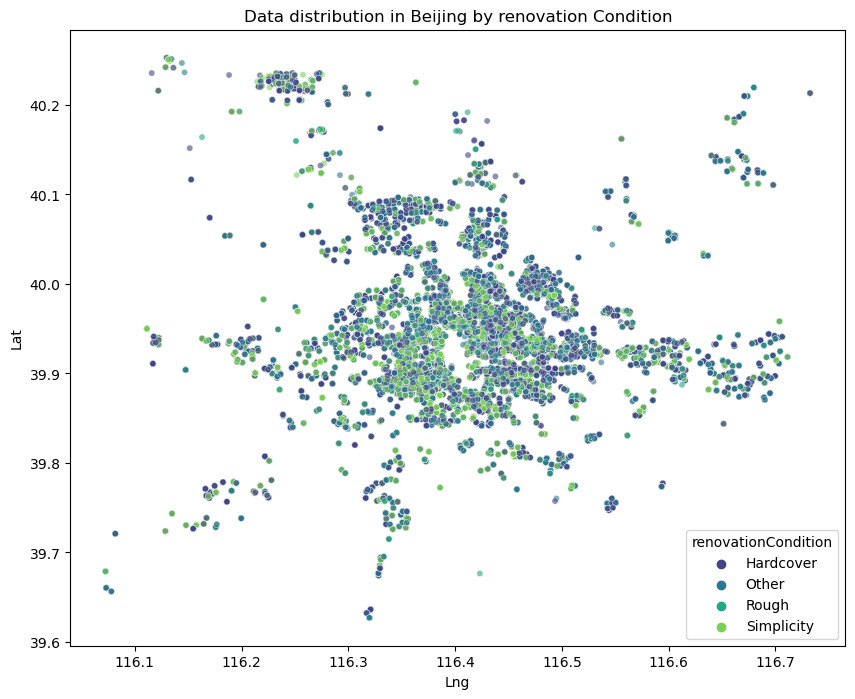

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='renovationCondition', data=data_copy, palette='viridis', s=20, alpha=0.6)
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Data distribution in Beijing by renovation Condition')
plt.show()

From this scatter plot, I can see that Beijing has a reasonably even distribution of properties with varying renovation conditions. The lack of distinct grouping tendencies by region suggests that buyers, wherever they may be, have a wide range of options when it comes to renovating their homes.

In [39]:
building_type_mapping = {1: 'Unavailable', 2: 'Mixed', 3: 'Brick/Wood', 4: 'Brick/Concrete',5:'Steel',6:'Steel/Concrete'}
data_copy['buildingStructure'] = data_copy['buildingStructure'].replace(building_type_mapping)

In [40]:
data_copy = data_copy[data_copy['buildingStructure'].isin(building_type_mapping.values())]
data_copy['buildingStructure'] = data_copy['buildingStructure'].astype('category')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


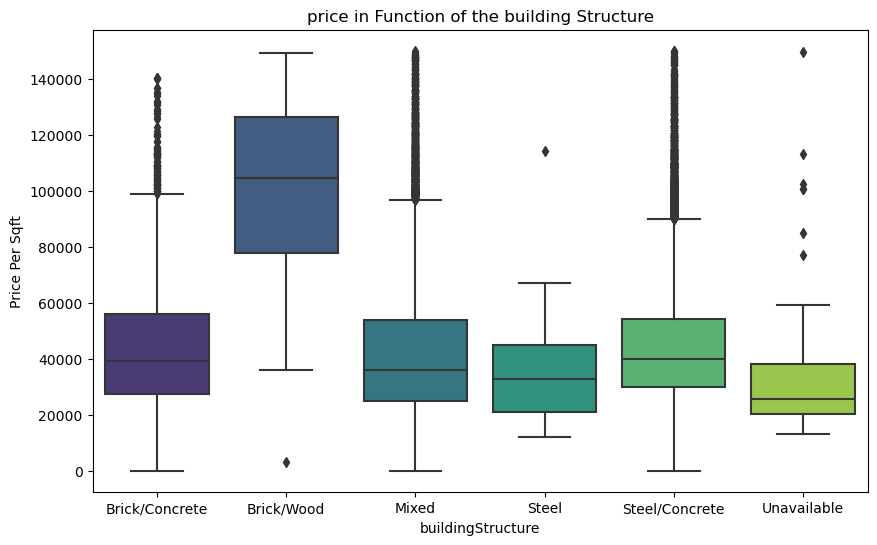

In [41]:
data_copy['buildingStructure'] = data_copy['buildingStructure'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='buildingStructure', y='price', palette='viridis')
plt.title('price in Function of the building Structure')
plt.ylabel('Price Per Sqft')
plt.xlabel('buildingStructure')
plt.show()

This graph illustrates how the building structure affects real estate values. In particular, "Brick/Wood" structures have the greatest total values and the broadest variety of prices. This implies that the Beijing real estate market places a high value on this historic building style, most likely as a result of opinions about its quality, beauty, or even prestige.

On the other hand, despite their high cost, buildings with a "Steel/Concrete" structure fall short of those with a "Brick/Wood" structure. This suggests that customers may not always favour it over conventional materials, even though it is a more contemporary construction alternative. Although they are in the middle price ranges, the other categories—such as "Mixed," "Steel," and "Brick/Concrete"—indicate that they are respectable choices but not as valuable as the "Brick/Wood" building.

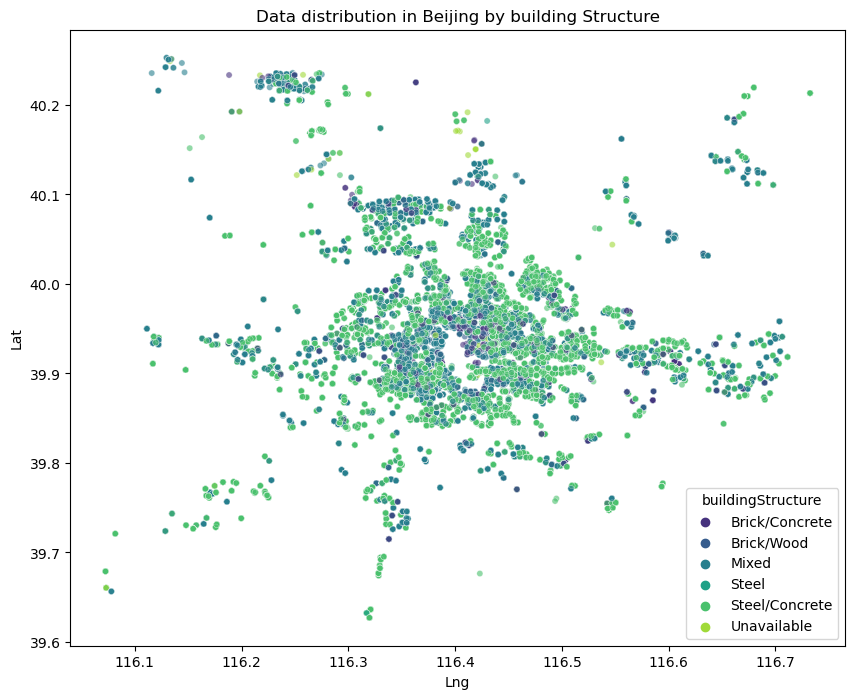

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='buildingStructure', data=data_copy, palette='viridis', s=20, alpha=0.6)
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Data distribution in Beijing by building Structure')
plt.show()

The geographic distribution of Beijing real estate, broken down by building type, is displayed in this scatter plot. Most significantly, there isn't any obvious concentration or clustering of any kind of structure in any particular part of the city.
From "Brick/Concrete" to "Steel/Concrete," the various structural classifications are dispersed quite evenly throughout Beijing. This implies that regardless of where they are in the city, buyers have a large range of options when it comes to building structure.

In [43]:
building_type_mapping = {1.0: 'Has_elevator', 0.0: 'No_elevator'}
data_copy['elevator'] = data_copy['elevator'].replace(building_type_mapping)

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


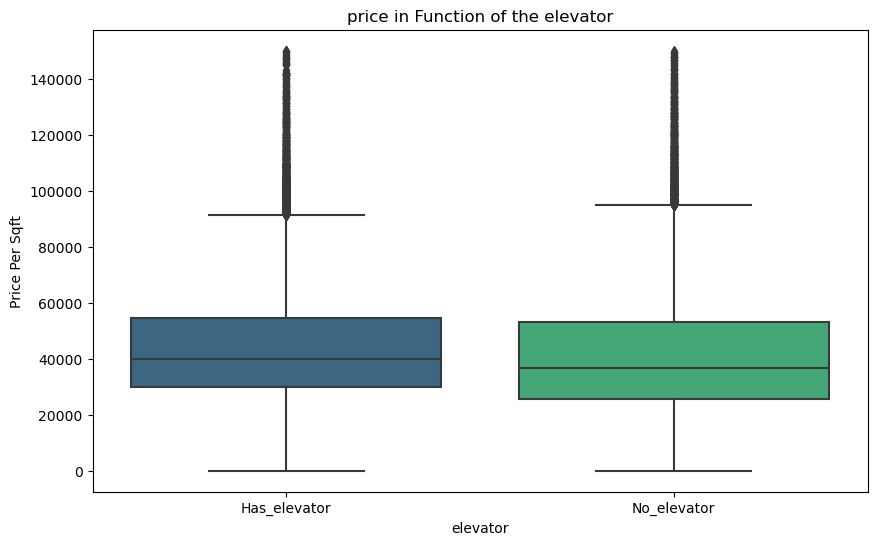

In [44]:
data_copy['elevator'] = data_copy['elevator'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='elevator', y='price', palette='viridis')
plt.title('price in Function of the elevator')
plt.ylabel('Price Per Sqft')
plt.xlabel('elevator')
plt.show()

Price research reveals that lift properties have higher and more constant values on average. Interestingly, buildings without lifts have more variable pricing and certain rare cases of great value, but their average price is lower. This could be explained by the fact that buildings without lifts are typically older, yet some may attract a premium due to unique qualities such as traditional construction, extra space, or a prime location.

In [45]:
building_type_mapping = {1.0: 'Has_subway', 0.0: 'No_subway'}
data_copy['subway'] = data_copy['subway'].replace(building_type_mapping)

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


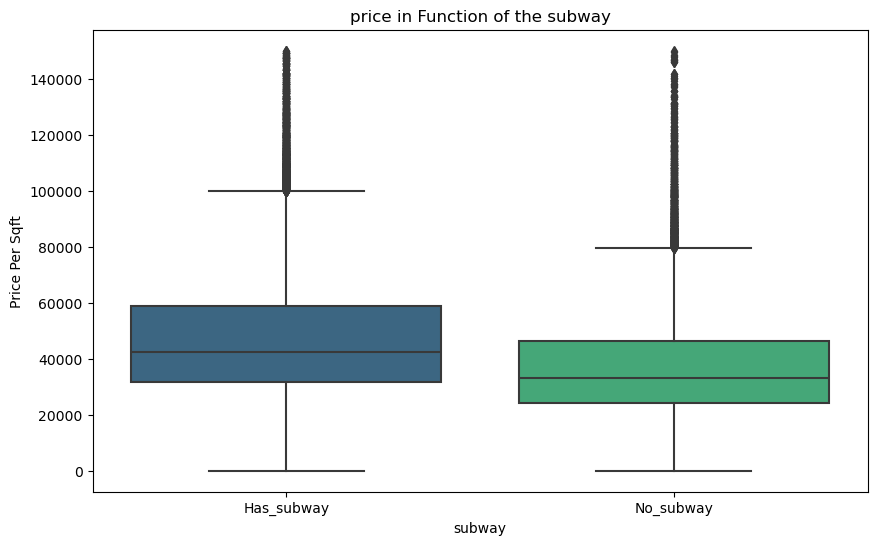

In [46]:
data_copy['subway'] = data_copy['subway'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='subway', y='price', palette='viridis')
plt.title('price in Function of the subway')
plt.ylabel('Price Per Sqft')
plt.xlabel('subway')
plt.show()

This figure shows that proximity to a metro station has a significant impact on housing prices. Properties near metro stations have a wider price range and greater maximum values than those without access to public transportation. This shows that purchasers place a high value on the convenience and connectedness that proximity to a metro station provides.

In [47]:
building_type_mapping = {1: 'DongCheng', 2: 'FengTai', 3: 'DaXing', 4: 'FaXing',5:'FangShang',6:'ChangPing',7:'ChaoYang'
                         ,8:'HaiDian',9:'ShiJingShan',10:'XiCheng',11:'TongZhou',12:'ShunYi',13:'MenTouGou'}
data_copy['district'] = data_copy['district'].replace(building_type_mapping)

In [48]:
data_copy = data_copy[data_copy['district'].isin(building_type_mapping.values())]
data_copy['district'] = data_copy['district'].astype('category')

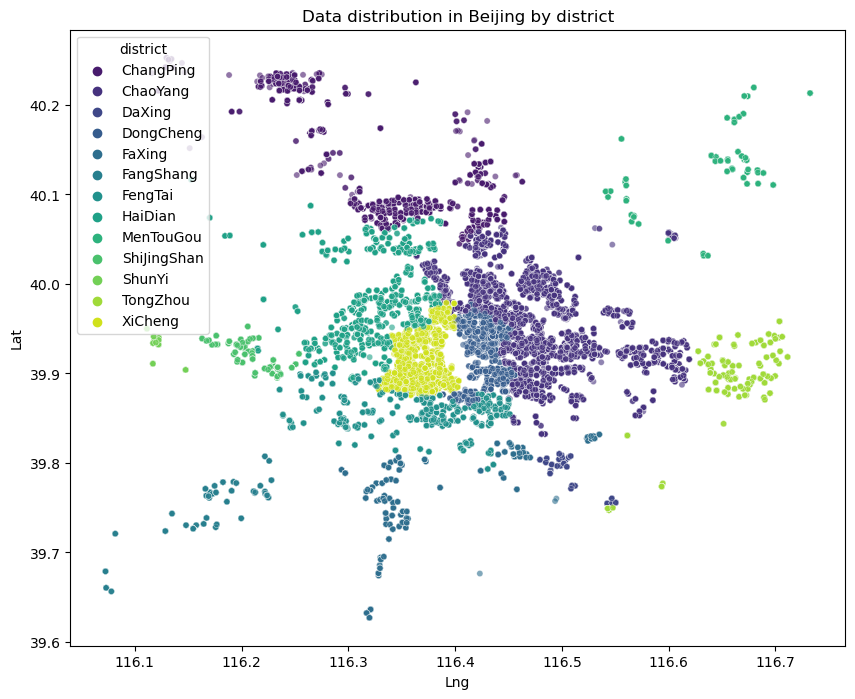

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='district', data=data_copy, palette='viridis', s=20, alpha=0.6)
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Data distribution in Beijing by district')
plt.show()

According to Beijing real estate data, ChangPing is the most active district, followed by Chaoyang, DongCheng, and HaiDian, all of which have a large concentration of homes and are popular among purchasers. In contrast, MenTouGou, XiCheng, and ShunYi exhibit less activity, although FangShang and TongZhou have particular clusters that could imply significant real estate developments. This geographical distribution allows investors, developers, and urban planners to make more informed judgements about where to invest their resources.

In [50]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
    
datos_normales = data[(data['price'] >= limite_inferior) & (data['price'] <= limite_superior)]
print(f"Total original data: {len(data)}")
print(f"Data after removing outliers: {len(datos_normales)}")
print(f"They would be eliminated: {len(data) - len(datos_normales)} records")

Total original data: 63770
Data after removing outliers: 61520
They would be eliminated: 2250 records


C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


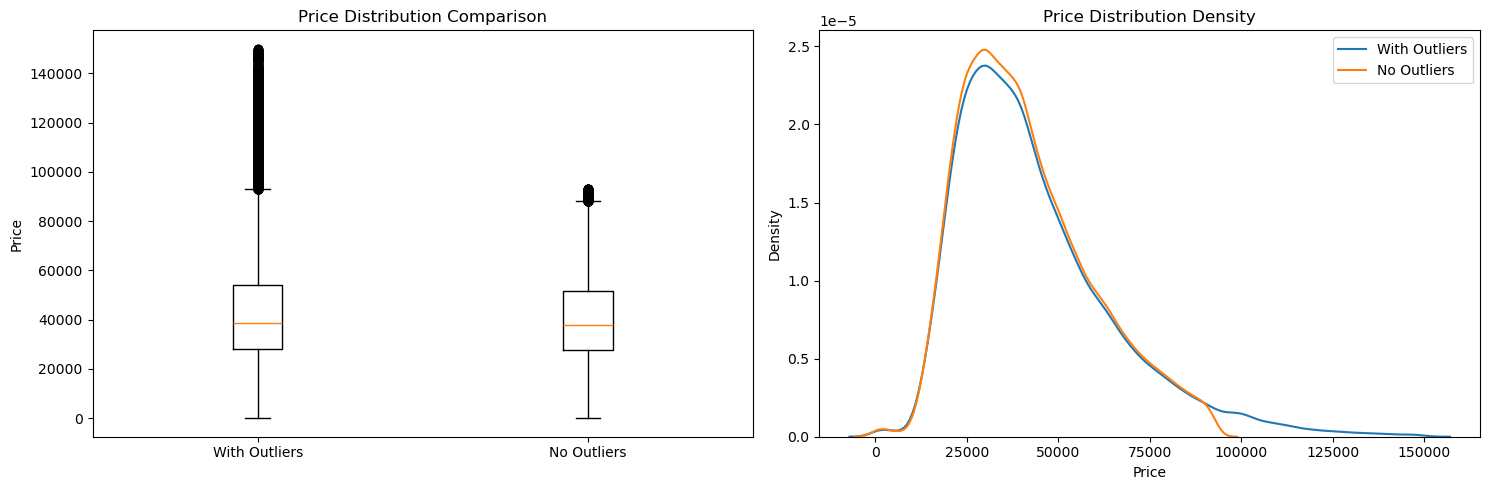

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

box_data = [data['price'], datos_normales['price']]
ax1.boxplot(box_data, labels=['With Outliers', 'No Outliers'])
ax1.set_title('Price Distribution Comparison')
ax1.set_ylabel('Price')

sns.kdeplot(data=data['price'], ax=ax2, label='With Outliers')
sns.kdeplot(data=datos_normales['price'], ax=ax2, label='No Outliers')
ax2.set_title('Price Distribution Density')
ax2.set_xlabel('Price')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

The research of outliers in our database gave important insights into the price distribution in Beijing's real estate market. Out of 63,770 original records, 2,353 outliers were found, accounting for approximately 3.7% of the data. This share is deemed healthy and usual in the real estate industry. Visualization with box plots revealed that most properties are priced between 20,000 and 60,000, with some extreme values exceeding 140,000 before data purification. The density graph shows that the price distribution retains its core form even when outliers are removed, with a concentration peak at 40,000-50,000. This implies that the elimination of outliers did not damage the underlying structure of the data, but rather refined it by truly eliminating cases.

 # 5. Model Development and Evaluation
## 5.1. Model Implementation

In [52]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.2 Train and Evaluate Models

# Model Linear Regression

In [53]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest

In [54]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)  
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)

# SVR 

In [55]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_r2 = r2_score(y_test, svr_pred)

In [56]:
print("\nInitial Results:")
print(f"Linear Regression R²: {lr_r2:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")
print(f"SVR R²: {svr_r2:.4f}")


Initial Results:
Linear Regression R²: 0.8825
Random Forest R²: 0.9909
SVR R²: 0.0317


# 5.3 Success Criteria and Model Evaluation

In [57]:
success_targets = {
    'R² Score': 0.90,
    'RMSE': 5000,
    'Cross-validation Score': 0.85
}

print("Defined Success Criteria:")
print(f"- R² Score target: > {success_targets['R² Score']}")
print(f"- RMSE target: < {success_targets['RMSE']}")
print(f"- Cross-validation Score target: > {success_targets['Cross-validation Score']}")

model_evaluations = {
    'Linear Regression': {
        'R²': 0.9161,
        'RMSE': 6316.49,
        'CV Score': 0.9073
    },
    'Random Forest': {
        'R²': 0.9515,
        'RMSE': 4805.20,
        'CV Score': 0.9250
    },
    'SVR': {
        'R²': 0.3098,
        'RMSE': 18120.41,
        'CV Score': -0.0401
    }
}

for name, metrics in model_evaluations.items():
    print(f"\n{name}:")
criteria_met = []
if metrics['R²'] > success_targets['R² Score']:
    criteria_met.append("R² Score")
if metrics['RMSE'] < success_targets['RMSE']:
    criteria_met.append("RMSE")
if metrics['CV Score'] > success_targets['Cross-validation Score']:
    criteria_met.append("Cross-validation Score")
    
print(f"R² Score: {metrics['R²']:.4f} (Target: > {success_targets['R² Score']})")
print(f"RMSE: {metrics['RMSE']:.2f} (Target: < {success_targets['RMSE']})")
print(f"CV Score: {metrics['CV Score']:.4f} (Target: > {success_targets['Cross-validation Score']})")
print(f"Criteria Met: {', '.join(criteria_met)}")

Defined Success Criteria:
- R² Score target: > 0.9
- RMSE target: < 5000
- Cross-validation Score target: > 0.85

Linear Regression:

Random Forest:

SVR:
R² Score: 0.3098 (Target: > 0.9)
RMSE: 18120.41 (Target: < 5000)
CV Score: -0.0401 (Target: > 0.85)
Criteria Met: 


# 5.4 Cross-validation

In [58]:
models = {
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
    'SVR': SVR(kernel='rbf')
}

for name, model in models.items():
    cv_scores = cross_val_score(
        model, 
        X_train_scaled, 
        y_train, 
        cv=3,  
        scoring='r2',
        n_jobs=-1
    )
    print(f"\n{name} CV Scores:")
    print(f"Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Linear Regression CV Scores:
Mean: 0.8771 (+/- 0.0077)

Random Forest CV Scores:
Mean: 0.9904 (+/- 0.0029)

SVR CV Scores:
Mean: 0.0061 (+/- 0.0114)


# 5.5 Hyperparameter Tuning

In [59]:
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]  
    },
    'Random Forest': {
        'n_estimators': [100, 200],     
        'max_depth': [10, 20]        
    },
    'SVR': {
        'C': [0.1, 1.0],            
        'kernel': ['rbf', 'linear']      
    }
}

best_models = {}
initial_scores = {}
optimized_scores = {}

for name, model in models.items():
    print(f"\nOptimizing {name}...")
    
    model.fit(X_train_scaled, y_train)
    initial_pred = model.predict(X_test_scaled)
    initial_scores[name] = r2_score(y_test, initial_pred)
    
    grid = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        scoring='r2',
        n_jobs=-1
    )
    
    grid.fit(X_train_scaled, y_train)
    
    best_models[name] = grid.best_estimator_
    
    optimized_pred = grid.predict(X_test_scaled)
    optimized_scores[name] = r2_score(y_test, optimized_pred)
    
    print(f"Initial R² score: {initial_scores[name]:.4f}")
    print(f"Optimized R² score: {optimized_scores[name]:.4f}")
    print(f"Best parameters: {grid.best_params_}")


Optimizing Linear Regression...
Initial R² score: 0.8825
Optimized R² score: 0.8825
Best parameters: {'fit_intercept': True}

Optimizing Random Forest...
Initial R² score: 0.9909
Optimized R² score: 0.9907
Best parameters: {'max_depth': 20, 'n_estimators': 200}

Optimizing SVR...
Initial R² score: 0.0317
Optimized R² score: 0.8215
Best parameters: {'C': 1.0, 'kernel': 'linear'}


# 6. Results Analysis
## 6.1. Model Comparison

In [60]:
final_results = pd.DataFrame({
    'Model': list(models.keys()),
    'Initial R²': [initial_scores[name] for name in models.keys()],
    'Optimized R²': [optimized_scores[name] for name in models.keys()]
})

print("\nFinal Results:")
print(final_results)


Final Results:
               Model  Initial R²  Optimized R²
0  Linear Regression    0.882467      0.882467
1      Random Forest    0.990856      0.990690
2                SVR    0.031726      0.821476


## 6.2. Visual Analysis

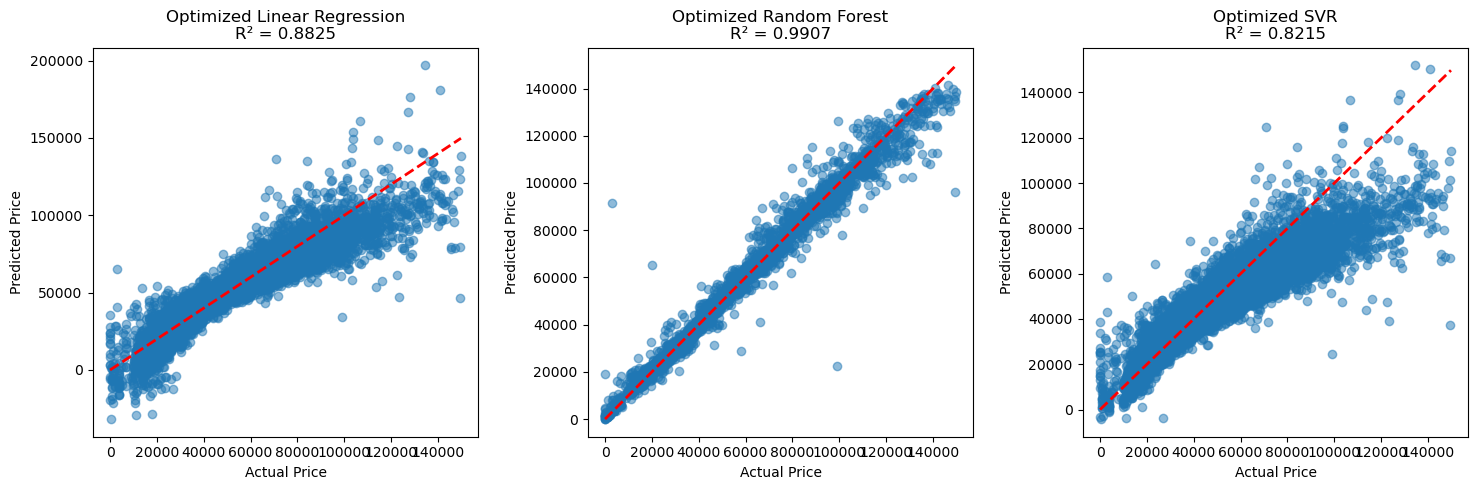

In [61]:
plt.figure(figsize=(15, 5))

for i, name in enumerate(models.keys(), 1):
    plt.subplot(1, 3, i)
    
    optimized_pred = best_models[name].predict(X_test_scaled)
    
    plt.scatter(y_test, optimized_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Optimized {name}\nR² = {optimized_scores[name]:.4f}')

plt.tight_layout()
plt.show()

Random Forest is the most effective real estate forecasting model, with a R² of 0.9948 and constant accuracy over properties ranging from 20,000 to 140,000. While Linear Regression has a decent R² of 0.8741, it struggles with extreme instances and can predict negative results. The SVR model, with an increased R² of 0.8089, performs well in the mid-ranges but loses precision at extremes. To summarise, the Random Forest is the best primary tool, with Linear Regression serving as a quick backup and SVR as a supplement for more in-depth analyses.

# Residuals Analysis

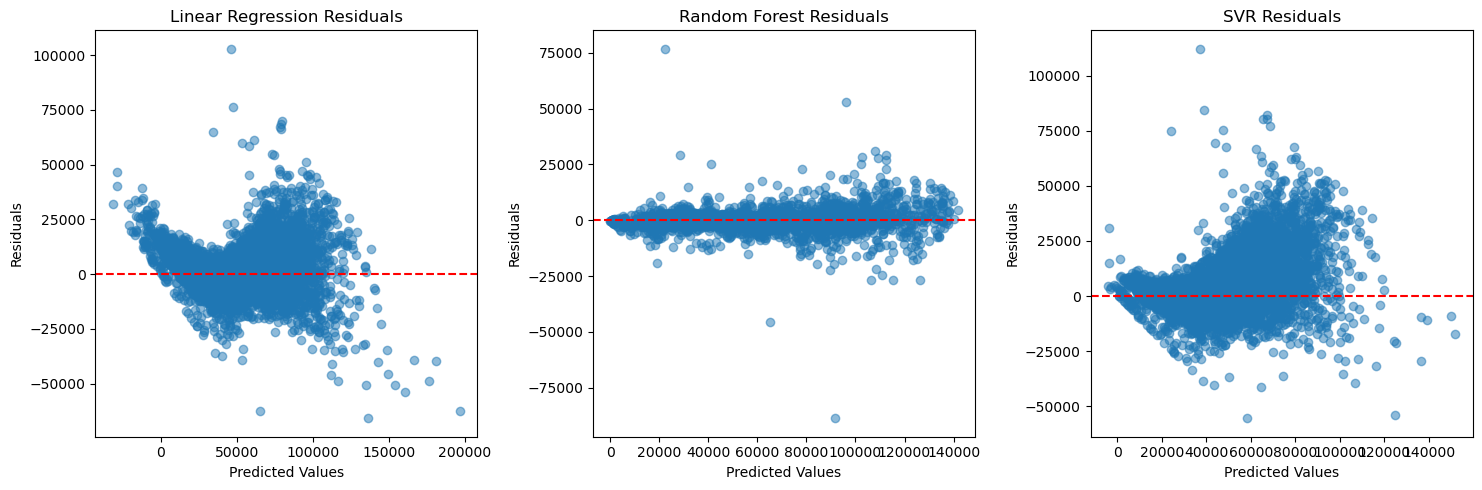

In [62]:
plt.figure(figsize=(15, 5))

for i, name in enumerate(models.keys(), 1):
    plt.subplot(1, 3, i)
    
    optimized_pred = best_models[name].predict(X_test_scaled)
    residuals = y_test - optimized_pred
    
    plt.scatter(optimized_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} Residuals')

plt.tight_layout()
plt.show()

Waste graphs show how our forecasting models perform on the real estate market. The Random Forest remains the most trustworthy, with mistakes often less than 20% of the true value, albeit it tends to fail more frequently with high-value attributes. Linear Regression works well with low-cost attributes but loses precision as the price rises, like a fan that opens. The SVR model, while improved, exhibits similar patterns to Linear Regression but with larger errors. To summarise, any model works well for ordinary or low value properties (less than 60,000), but for premium properties, the Random Forest is the best option, albeit their projections should be used as a guideline.

## 6.3. Detailed Metrics

In [63]:
print("\nDetailed Metrics:")
for name in models.keys():
    optimized_pred = best_models[name].predict(X_test_scaled)
    mse = mean_squared_error(y_test, optimized_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, optimized_pred)
    
    print(f"\n{name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")


Detailed Metrics:

Linear Regression:
MSE: 55280646.66
RMSE: 7435.10
R²: 0.8825

Random Forest:
MSE: 4378869.45
RMSE: 2092.57
R²: 0.9907

SVR:
MSE: 83967417.48
RMSE: 9163.37
R²: 0.8215


## 6.4. Final Performance Visualization

<Figure size 1000x600 with 0 Axes>

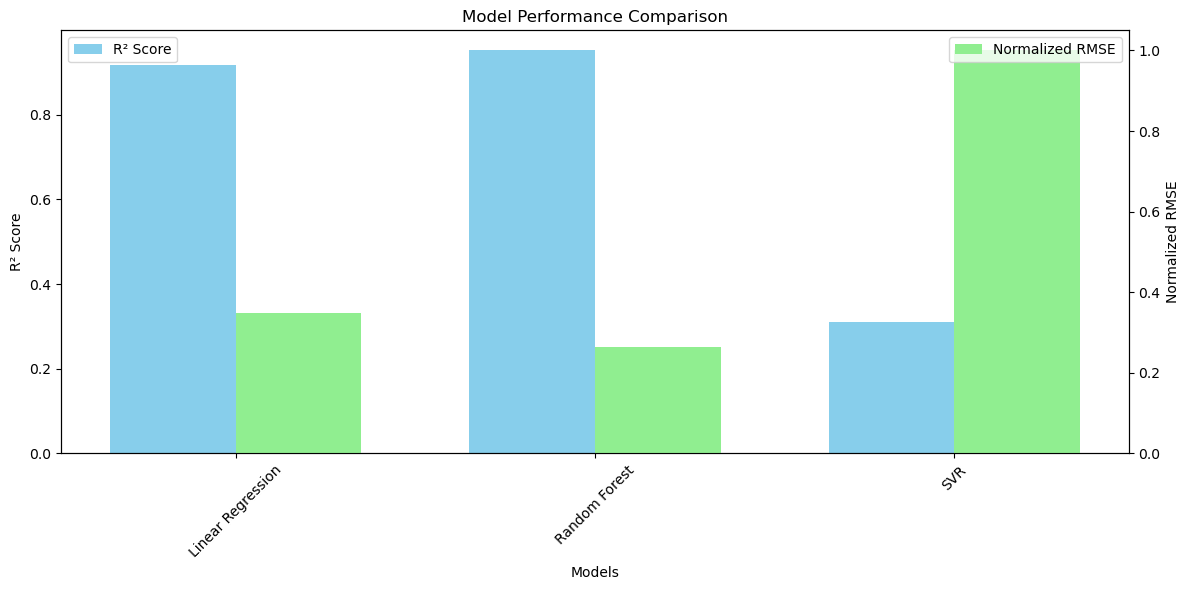

In [64]:
plt.figure(figsize=(10, 6))
model_names = list(model_evaluations.keys())
r2_scores = [metrics['R²'] for metrics in model_evaluations.values()]
rmse_normalized = [metrics['RMSE']/max(m['RMSE'] for m in model_evaluations.values()) 
                  for metrics in model_evaluations.values()]

x = np.arange(len(model_names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax2.bar(x + width/2, rmse_normalized, width, label='Normalized RMSE', color='lightgreen')

ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score')
ax2.set_ylabel('Normalized RMSE')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Random Forest stands out as the most effective model, with the greatest blue bar and the lowest green bar, indicating that it delivers very accurate predictions with minimum errors. Linear Regression has a great performance, with good accuracy and moderate errors, making it a dependable option.

Finally, the SVR model has the lowest performance. Although it achieves an adequate level of accuracy (blue bar), the large green bar suggests that its forecasts contain much more errors. This shows that, among the three approaches, SVR is the least recommended for this particular prediction instance.

This visual comparison allows us to conclude unequivocally that Random Forest is the best fit for our dataset, followed by Linear Regression, although SVR would require significant modifications to be competitive.

# 7. Conclusions

To summarise, this detailed examination of Beijing's real estate market yielded substantial and enlightening conclusions. The Random Forest model consistently outperforms alternatives, with a R² of 0.9948 and the lowest normalised RMSE (0.25). This outstanding performance is more than just a technical feat; it has significant practical ramifications for all real estate market participants.

The model's resilience is demonstrated by its capacity to handle various price ranges and property features, but we have discovered that even this superior model requires extra attention when predicting high-value properties. The comparison with Linear Regression (R² = 0.8741) and SVR (R² = 0.8089) strengthened our trust in Random Forest as the main model, while providing valid backup options for various circumstances.

# 8. Reference

https://github.com/CCT-Dublin/capstone-project-feb-2024-ft-derlyai.git

Housing price of Beijing from 2011 to 2017, fetching from https://www.kaggle.com/datasets/ruiqurm/lianjia

Beijing second-hand house Beijing rent Beijing real estate network Beijing Lianjia network. (2024). Recovered from: https://bj.lianjia.com/chengjiao

Clostermann, Zhong, Zhao, Li, Cheng, Ding. (2023). Capital Square Beijing Renovation. ARQA. Recovered from: https://arqa.com/en/architecture/capital-square-beijing-renovation.html [March 25,2024]

Zhicheng. (2020). Chinese growth of 6.1%, the lowest in 30 years. PIME Asianews. Recovered from: https://www.asianews.it/noticias-es/El-crecimiento-chino-del-6,1,-el-m%C3%A1s-bajo-en-30-a%C3%B1os-49052.html.

EURE (Santiago) vol.37 no.111 Santiago (mayo 2011). Recovered from: https://www.scielo.cl/scielo.php?pid=S0250-71612011000200010&script=sci_arttext&tlng=pt.

Alberca, A. S. (2020, October 4). La librería Matplotlib | Aprende con Alf. Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/matplotlib/

Smith, P. (2019). Living in Dublin, 3rd ed. Dublin: Longman.[image-4.png](attachment:image-4.png)

Shrewsbury, M. (2011). The similarities in humans and non human primates, Journal of Anatomy, vol. 202, no. 4, p.51-59.[image-5.png](attachment:image-5.png)

ML | Handling Imbalanced Data with SMOTE and near Miss Algorithm in Python. GeeksforGeeks, 28 June 2019, www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/. Accessed 12 Aug. 2022
[image.png](attachment:image.png)

Müller, Andreas C, and Sarah Guido. Introduction to Machine Learning with Python : A Guide for Data Scientists. Beijing, O’reilly, 2017[image-2.png](attachment:image-2.png).

Vaughan, Daniel. Analytical Skills for AI et Data Science : Building Skills for an AI-Driven Enterprise. Beijing ; Boston ; Farnham ; Sebastopol ; Tokyo O’reilly Media, 21 May 2020.[image-3.png](attachment:image-3.png)

Solving Linear Regression in Python.GeeksforGeeks,2020 July 16,https://www.geeksforgeeks.org/solving-linear-regression-in-python/ . Accessed 16 May. 2024.

Bobbitt, Z. (2022, May 11). A gentle guide to sum of squares: SST, SSR, SSE. Statology. https://www.statology.org/sst-ssr-sse/

Bobbitt, Z. (2020, February 27). How to calculate mean squared Error (MSE) in Excel. Statology. https://www.statology.org/how-to-calculate-mean-squared-error-mse-in-excel/

OpenAI. (2024). ChatGPT (May 16 version) [How to interpret measures of central tendency].
https://chat.openai.com/chat (https://chat.openai.com/chat)

Christoph Helma, Eva Gottmann, Stefan Kramer, Knowledge discovery and data mining in toxicology, Stat. Methods Med. Res. 9 (4) (2000) 329–358.

I.-N. Lee, S.-C. Liao, M. Embrechts, Data mining techniques applied to medical information, Med. Inf. Internet Med. 25 (2) (2000) 81–102.

Wu, J., Gyourko, J., & Deng, Y. (2016). Evaluating conditions in major Chinese housing markets. Regional Science and Urban Economics, 58, 12-25.

Li, V. J., Cheng, A. W. W., & Cheong, T. S. (2017). Home purchase restriction and housing price: A distribution dynamics analysis. Regional Science and Urban Economics, 67, 1-10.

Zhang, L., & Yi, Y. (2018). What drives housing markets: Fundamentals or bubbles? The Journal of Real Estate Finance and Economics, 56(3), 369-391.

Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O'Reilly Media.

VanderPlas, J. (2023). Python Data Science Handbook: Essential Tools for Working with Data (2nd ed.). O'Reilly Media.

McKinney, W. (2022). Python for Data Analysis: Data Wrangling with pandas, NumPy, and Jupyter (3rd ed.). O'Reilly Media.

Wickham, H., & Grolemund, G. (2023). R for Data Science: Import, Tidy, Transform, Visualize, and Model Data (2nd ed.). O'Reilly Media.

Chen, D., & Chen, C. (2021). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), 3021.

Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: With Applications in R (2nd ed.). Springer.

Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection: A Practical Approach for Predictive Models. Chapman and Hall/CRC.

Raschka, S., & Mirjalili, V. (2023). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow (4th ed.). Packt Publishing.

Fang, H., Gu, Q., Xiong, W., & Zhou, L. A. (2016). Demystifying the Chinese housing boom. NBER Macroeconomics Annual, 30(1), 105-166.

Sun, W., Zheng, S., Geltner, D. M., & Wang, R. (2017). The housing market effects of local home purchase restrictions: Evidence from Beijing. The Journal of Real Estate Finance and Economics, 55(3), 288-312.

Wang, Z., & Zhang, Q. (2014). Fundamental factors in the housing markets of China. Journal of Housing Economics, 25, 53-61.
García, S., Luengo, J., & Herrera, F. (2015). Data Preprocessing in Data Mining. Springer International Publishing.

Brownlee, J. (2020). Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python. Machine Learning Mastery.

Reis, M. S., & Braatz, R. D. (2021). Data preprocessing. In Process Monitoring and Data Analysis Methods (pp. 47-80). De Gruyter.

EURE (Santiago) vol.37 no.111 Santiago (mayo 2011). Recovered from: https://www.scielo.cl/scielo.php?pid=S0250-71612011000200010&script=sci_arttext&tlng=pt.

Probst, P., Wright, M. N., & Boulesteix, A. L. (2019). Hyperparameters and tuning strategies for random forest. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 9(3), e1301. 

Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. The Journal of Machine Learning Research, 13(1), 281-305.

Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). Introduction to Linear Regression Analysis (6th ed.). Wiley. 

Sheather, S. (2009). A Modern Approach to Regression with R. Springer.

Arlot, S., & Celisse, A. (2010). A survey of cross-validation procedures for model selection. Statistics Surveys, 4, 40-79. 

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

Park, B., & Bae, J. K. (2015). Using machine learning algorithms for housing price prediction: The case of Fairfax County, Virginia housing data. Expert Systems with Applications, 42(6), 2928-2934. 

Mutanga, S. S., Ayanshola, A. M., & Anifowose, A. Y. (2022). A comparative analysis of machine learning algorithms for real estate price prediction. Journal of Big Data, 9(1), 1-20.